# Zomato Restaurants

The given dataset is about restaurants around the world. 

It contains information like Location,PriceRange,Cusines,Rating etc

Using the information we need to predict:
1. Avg Price for tow (Regression)
2. Price Range (Classification)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report,auc
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1= pd.read_csv("C:\\Users\\pooja\\OneDrive\\Desktop\\Internship\\zomato.csv")
df1.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df1.shape

(9551, 21)

In [4]:
df2= pd.read_csv("C:\\Users\\pooja\\OneDrive\\Desktop\\Internship\\Country-Code.csv")
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
data=pd.merge (df1,df2)
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [6]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(9551, 22)

The dataset has no duplicate values

The dataset has both numerical and categorical data

The dataset also seems to have null values

In [7]:
# checking for missing values
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Cuisines column has null values

Dropping columns: 

Restaurant ID, Restaurant Name, Address as they are unique for every Restaurant and will not add value to our analysis 

Locality Verbose as Locality and Locality Verbose are same for most of the rows

In [8]:
data= data.drop (columns=['Restaurant ID','Restaurant Name','Address','Locality Verbose'])
data.shape

(9551, 18)

In [9]:
data.head()

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
data.nunique()

Country Code              15
City                     141
Locality                1208
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  14
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

Dropping Columns: 

Rating color as it is same as Rating text

Switch to order menu as it has only one value 'No'

Country code as it is same as Country Also the model will treat it as numerical data which could effect our anlysis

In [11]:
data=data.drop(columns=['Rating color','Switch to order menu','Country Code'])
data.shape

(9551, 15)

Now that we have deleted the columns which would not add value to our analysis
Locality has too many categories making changes to column to reduce the number of categories 

In [12]:
data['Locality'] = data['Locality'].str.split(',')
data['Locality']


0        [Century City Mall,  Poblacion,  Makati City]
1       [Little Tokyo,  Legaspi Village,  Makati City]
2       [Edsa Shangri-La,  Ortigas,  Mandaluyong City]
3           [SM Megamall,  Ortigas,  Mandaluyong City]
4           [SM Megamall,  Ortigas,  Mandaluyong City]
                             ...                      
9546                                        [Karakí_y]
9547                                       [Koôuyolu]
9548                                     [Kuruí_eôme]
9549                                     [Kuruí_eôme]
9550                                            [Moda]
Name: Locality, Length: 9551, dtype: object

In [13]:
locality=[]
for i in range(0,9551):
    try:
        locality.append(data['Locality'][i][1])
    except IndexError as e:
        locality.append(data['Locality'][i][0])
    
locality

[' Poblacion',
 ' Legaspi Village',
 ' Ortigas',
 ' Ortigas',
 ' Ortigas',
 ' Ortigas',
 ' Mall of Asia Complex',
 ' Mall of Asia Complex',
 ' Pasay City',
 'Kapitolyo',
 'Kapitolyo',
 'Kapitolyo',
 ' Diliman',
 'Addition Hills',
 'Little Baguio',
 ' Don Jose',
 ' Don Jose',
 'Tagaytay City',
 ' Bonifacio Global City',
 'Bonifacio Global City',
 ' Bonifacio Global City',
 ' Bonifacio Global City',
 'Asa Norte',
 'Asa Norte',
 'Asa Norte',
 'Asa Norte',
 'Asa Sul',
 'Asa Sul',
 'Asa Sul',
 'Asa Sul',
 'Asa Sul',
 'Asa Sul',
 'í\x81guas Claras',
 'í\x81guas Claras',
 'í\x81guas Claras',
 ' Asa Norte',
 'Lago Sul',
 ' Guaríç I',
 ' Lago Sul',
 'Setor De Clubes Esportivos Sul',
 ' Lago Norte',
 'Sudoeste',
 'Barra da Tijuca',
 'Centro',
 'Copacabana',
 'Copacabana',
 'Copacabana',
 ' Copacabana',
 'Gíçvea',
 'Ipanema',
 'Ipanema',
 'Ipanema',
 'Lagoa',
 ' Barra da Tijuca',
 'Leblon',
 'Leblon',
 'Leme',
 'Leme',
 'Madureira',
 'Santa Teresa',
 'Tijuca',
 'Urca',
 ' Centro',
 ' Centro',
 'C

In [14]:
print (len(locality))

9551


In [15]:
data['locality']=locality
data=data.drop(columns=['Locality'])

In [16]:
data['locality'].nunique()

1053

The number of categories in locality column has slighty reduced (from 1208 to 1053)

Column Price range needs to be changed to object datatype from int64 as it is a categorical column 

In [17]:
data['Price range']= data['Price range'].astype(object)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9551 non-null   object 
 1   Longitude             9551 non-null   float64
 2   Latitude              9551 non-null   float64
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Is delivering now     9551 non-null   object 
 9   Price range           9551 non-null   object 
 10  Aggregate rating      9551 non-null   float64
 11  Rating text           9551 non-null   object 
 12  Votes                 9551 non-null   int64  
 13  Country               9551 non-null   object 
 14  locality              9551 non-null   object 
dtypes: float64(3), int64(

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Average Cost for two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000
Aggregate rating,9551.0,2.666370,1.516378,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9551.0,156.909748,430.169145,0.000000,5.000000,31.000000,131.000000,10934.000000


The numerical features indicate skewness and outliers which we will look into in detail during visualization

Converting latitude and longitude to categories

In [20]:
for i in data['Longitude']:
    if -160<=i<=-100 :
        data['Longitude'].replace({i:1},inplace=True)
    elif -100<=i<=-40:
        data['Longitude'].replace({i:2},inplace=True)
    elif -40<=i<=20:
        data['Longitude'].replace({i:3},inplace=True)
    elif 20<=i<=80:
        data['Longitude'].replace({i:4},inplace=True)
    elif 80<=i<=140:
        data['Longitude'].replace({i:5},inplace=True)
    else:
        data['Longitude'].replace({i:6},inplace=True)

data['Longitude']
        
        

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
9546    4.0
9547    4.0
9548    4.0
9549    4.0
9550    4.0
Name: Longitude, Length: 9551, dtype: float64

In [21]:
for i in data['Latitude']:
    if -45<=i<=-30 :
        data['Latitude'].replace({i:1},inplace=True)
    elif -30<=i<=-15:
        data['Latitude'].replace({i:2},inplace=True)
    elif -15<=i<=0:
        data['Latitude'].replace({i:3},inplace=True)
    elif 0<=i<=15:
        data['Latitude'].replace({i:4},inplace=True)
    elif 15<=i<=30:
        data['Latitude'].replace({i:5},inplace=True)
    else:
        data['Latitude'].replace({i:6},inplace=True)

data['Latitude']

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
9546    6.0
9547    6.0
9548    6.0
9549    6.0
9550    6.0
Name: Latitude, Length: 9551, dtype: float64

In [22]:
data['Longitude']= data['Longitude'].astype(object)
data['Latitude']= data['Latitude'].astype(object)

Now that latitude and longitude are sorted

Looking at Cuisines
1. Imputing null values with bfill
2. Try to reduce categories

In [23]:
data['Cuisines'] = data['Cuisines'].fillna(method='bfill')
data.isna().sum()


City                    0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
locality                0
dtype: int64

In [24]:
data['Cuisines'].value_counts()

North Indian                                  936
North Indian, Chinese                         511
Fast Food                                     355
Chinese                                       354
North Indian, Mughlai                         334
                                             ... 
Healthy Food, North Indian, Italian, Salad      1
Bengali, Fast Food                              1
North Indian, Rajasthani, Asian                 1
Chinese, Thai, Malaysian, Indonesian            1
Italian, World Cuisine                          1
Name: Cuisines, Length: 1825, dtype: int64

In [25]:
data['Cuisines'] = data['Cuisines'].str.split(',')

data['Cuisines']

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9551, dtype: object

In [26]:
Cuisine=[]
for i in range(0,9551):
    Cuisine.append(data['Cuisines'][i][0])
    
    
Cuisine

['French',
 'Japanese',
 'Seafood',
 'Japanese',
 'Japanese',
 'Chinese',
 'Asian',
 'Seafood',
 'European',
 'Filipino',
 'Filipino',
 'American',
 'Filipino',
 'Filipino',
 'Korean',
 'Cafe',
 'Italian',
 'Filipino',
 'Cafe',
 'Cafe',
 'Seafood',
 'American',
 'Fast Food',
 'Cafe',
 'Bakery',
 'Brazilian',
 'Pizza',
 'Japanese',
 'Arabian',
 'Japanese',
 'Brazilian',
 'Italian',
 'Pizza',
 'Bar Food',
 'Mexican',
 'International',
 'Peruvian',
 'American',
 'Seafood',
 'International',
 'Italian',
 'American',
 'Seafood',
 'Desserts',
 'Juices',
 'Beverages',
 'Lebanese',
 'Burger',
 'Brazilian',
 'Brazilian',
 'Brazilian',
 'Brazilian',
 'Brazilian',
 'Italian',
 'Japanese',
 'Bakery',
 'Brazilian',
 'Brazilian',
 'Bar Food',
 'Brazilian',
 'Brazilian',
 'Brazilian',
 'Italian',
 'Steak',
 'Indian',
 'Brazilian',
 'Beverages',
 'French',
 'Brazilian',
 'Brazilian',
 'French',
 'Sushi',
 'BBQ',
 'Sushi',
 'Gourmet Fast Food',
 'Brazilian',
 'Italian',
 'Brazilian',
 'Brazilian',
 'Br

In [27]:
data['Cuisine']=Cuisine
data=data.drop(columns=['Cuisines'])
data['Cuisine'].nunique()


119

We see a drastic change in the categories in the cuisine column (from 1825 to 119)

The idea was to keep only the first cuisine mentioned in the data as it is generally the main type of food a restaurant is famous for  

In [28]:
#Dividing data to numerical and categorical
C_data = data.select_dtypes(include=['object'])
N_data = data.select_dtypes(include=['int64', 'float64'])

In [29]:
C_data.head()

,City,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Country,locality,Cuisine
0,Makati City,3.0,4.0,Botswana Pula(P),Yes,No,No,3,Excellent,Phillipines,Poblacion,French
1,Makati City,3.0,4.0,Botswana Pula(P),Yes,No,No,3,Excellent,Phillipines,Legaspi Village,Japanese
2,Mandaluyong City,3.0,4.0,Botswana Pula(P),Yes,No,No,4,Very Good,Phillipines,Ortigas,Seafood
3,Mandaluyong City,3.0,4.0,Botswana Pula(P),No,No,No,4,Excellent,Phillipines,Ortigas,Japanese
4,Mandaluyong City,3.0,4.0,Botswana Pula(P),Yes,No,No,4,Excellent,Phillipines,Ortigas,Japanese


In [30]:
column_names = C_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')


Column Name        : City
------------------------------------------
New Delhi       57.302900
Gurgaon         11.705581
Noida           11.307716
Faridabad        2.627997
Ghaziabad        0.261753
                  ...    
Huskisson        0.010470
Panchkula        0.010470
Forrest          0.010470
Flaxton          0.010470
Chatham-Kent     0.010470
Name: City, Length: 141, dtype: float64


Column Name        : Longitude
------------------------------------------
3.0    96.199351
4.0     1.947440
2.0     0.900429
1.0     0.565386
5.0     0.387394
Name: Longitude, dtype: float64


Column Name        : Latitude
------------------------------------------
4.0    96.984609
2.0     1.099361
1.0     0.816668
6.0     0.502565
5.0     0.387394
3.0     0.209402
Name: Latitude, dtype: float64


Column Name        : Currency
------------------------------------------
Indian Rupees(Rs.)        90.587373
Dollar ($)                 5.036122
Pounds(Œ£)                 0.837609
Brazilian Real(RD)   

In [31]:
#Checking categories with lesser percentage to others
def change_to_others(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 1:
            return 'others'
    return x

columns_not_to_be_considered = ['Latitude','Longitude','Currency','Is delivering now','Country','Price range']
column_names = C_data.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

for column_name in columns_to_be_changed:
    value_counts_df = data[column_name].value_counts(normalize=True) * 100
    data[column_name] = data[column_name].apply(lambda x:change_to_others(x, value_counts_df))
    

    

In [32]:
column_names = C_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : City
------------------------------------------
New Delhi    57.302900
others       17.055806
Gurgaon      11.705581
Noida        11.307716
Faridabad     2.627997
Name: City, dtype: float64


Column Name        : Longitude
------------------------------------------
3.0    96.199351
4.0     1.947440
2.0     0.900429
1.0     0.565386
5.0     0.387394
Name: Longitude, dtype: float64


Column Name        : Latitude
------------------------------------------
4.0    96.984609
2.0     1.099361
1.0     0.816668
6.0     0.502565
5.0     0.387394
3.0     0.209402
Name: Latitude, dtype: float64


Column Name        : Currency
------------------------------------------
Indian Rupees(Rs.)        90.587373
Dollar ($)                 5.036122
Pounds(Œ£)                 0.837609
Brazilian Real(RD)         0.628206
Emirati Diram(AED)         0.628206
Rand(R)                    0.628206
NewZealand ($)             0.418804
Turkish Lira(TL)           0.345514
Botswana Pula(P)         

Dropping Locality from the dataset after binning the catagories 90% of the data is categorised as 'others'

In [33]:
data=data.drop(columns=['locality'])


In [34]:
new_C_data = data.select_dtypes(include=['object'])
new_C_data

,City,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Country,Cuisine
0,others,3.0,4.0,Botswana Pula(P),Yes,No,No,3,Excellent,Phillipines,others
1,others,3.0,4.0,Botswana Pula(P),Yes,No,No,3,Excellent,Phillipines,others
2,others,3.0,4.0,Botswana Pula(P),Yes,No,No,4,Very Good,Phillipines,others
3,others,3.0,4.0,Botswana Pula(P),No,No,No,4,Excellent,Phillipines,others
4,others,3.0,4.0,Botswana Pula(P),Yes,No,No,4,Excellent,Phillipines,others
...,...,...,...,...,...,...,...,...,...,...,...
9546,others,4.0,6.0,Turkish Lira(TL),No,No,No,3,Very Good,Turkey,others
9547,others,4.0,6.0,Turkish Lira(TL),No,No,No,3,Very Good,Turkey,others
9548,others,4.0,6.0,Turkish Lira(TL),No,No,No,4,Good,Turkey,Italian
9549,others,4.0,6.0,Turkish Lira(TL),No,No,No,4,Very Good,Turkey,others


<function matplotlib.pyplot.show(close=None, block=None)>

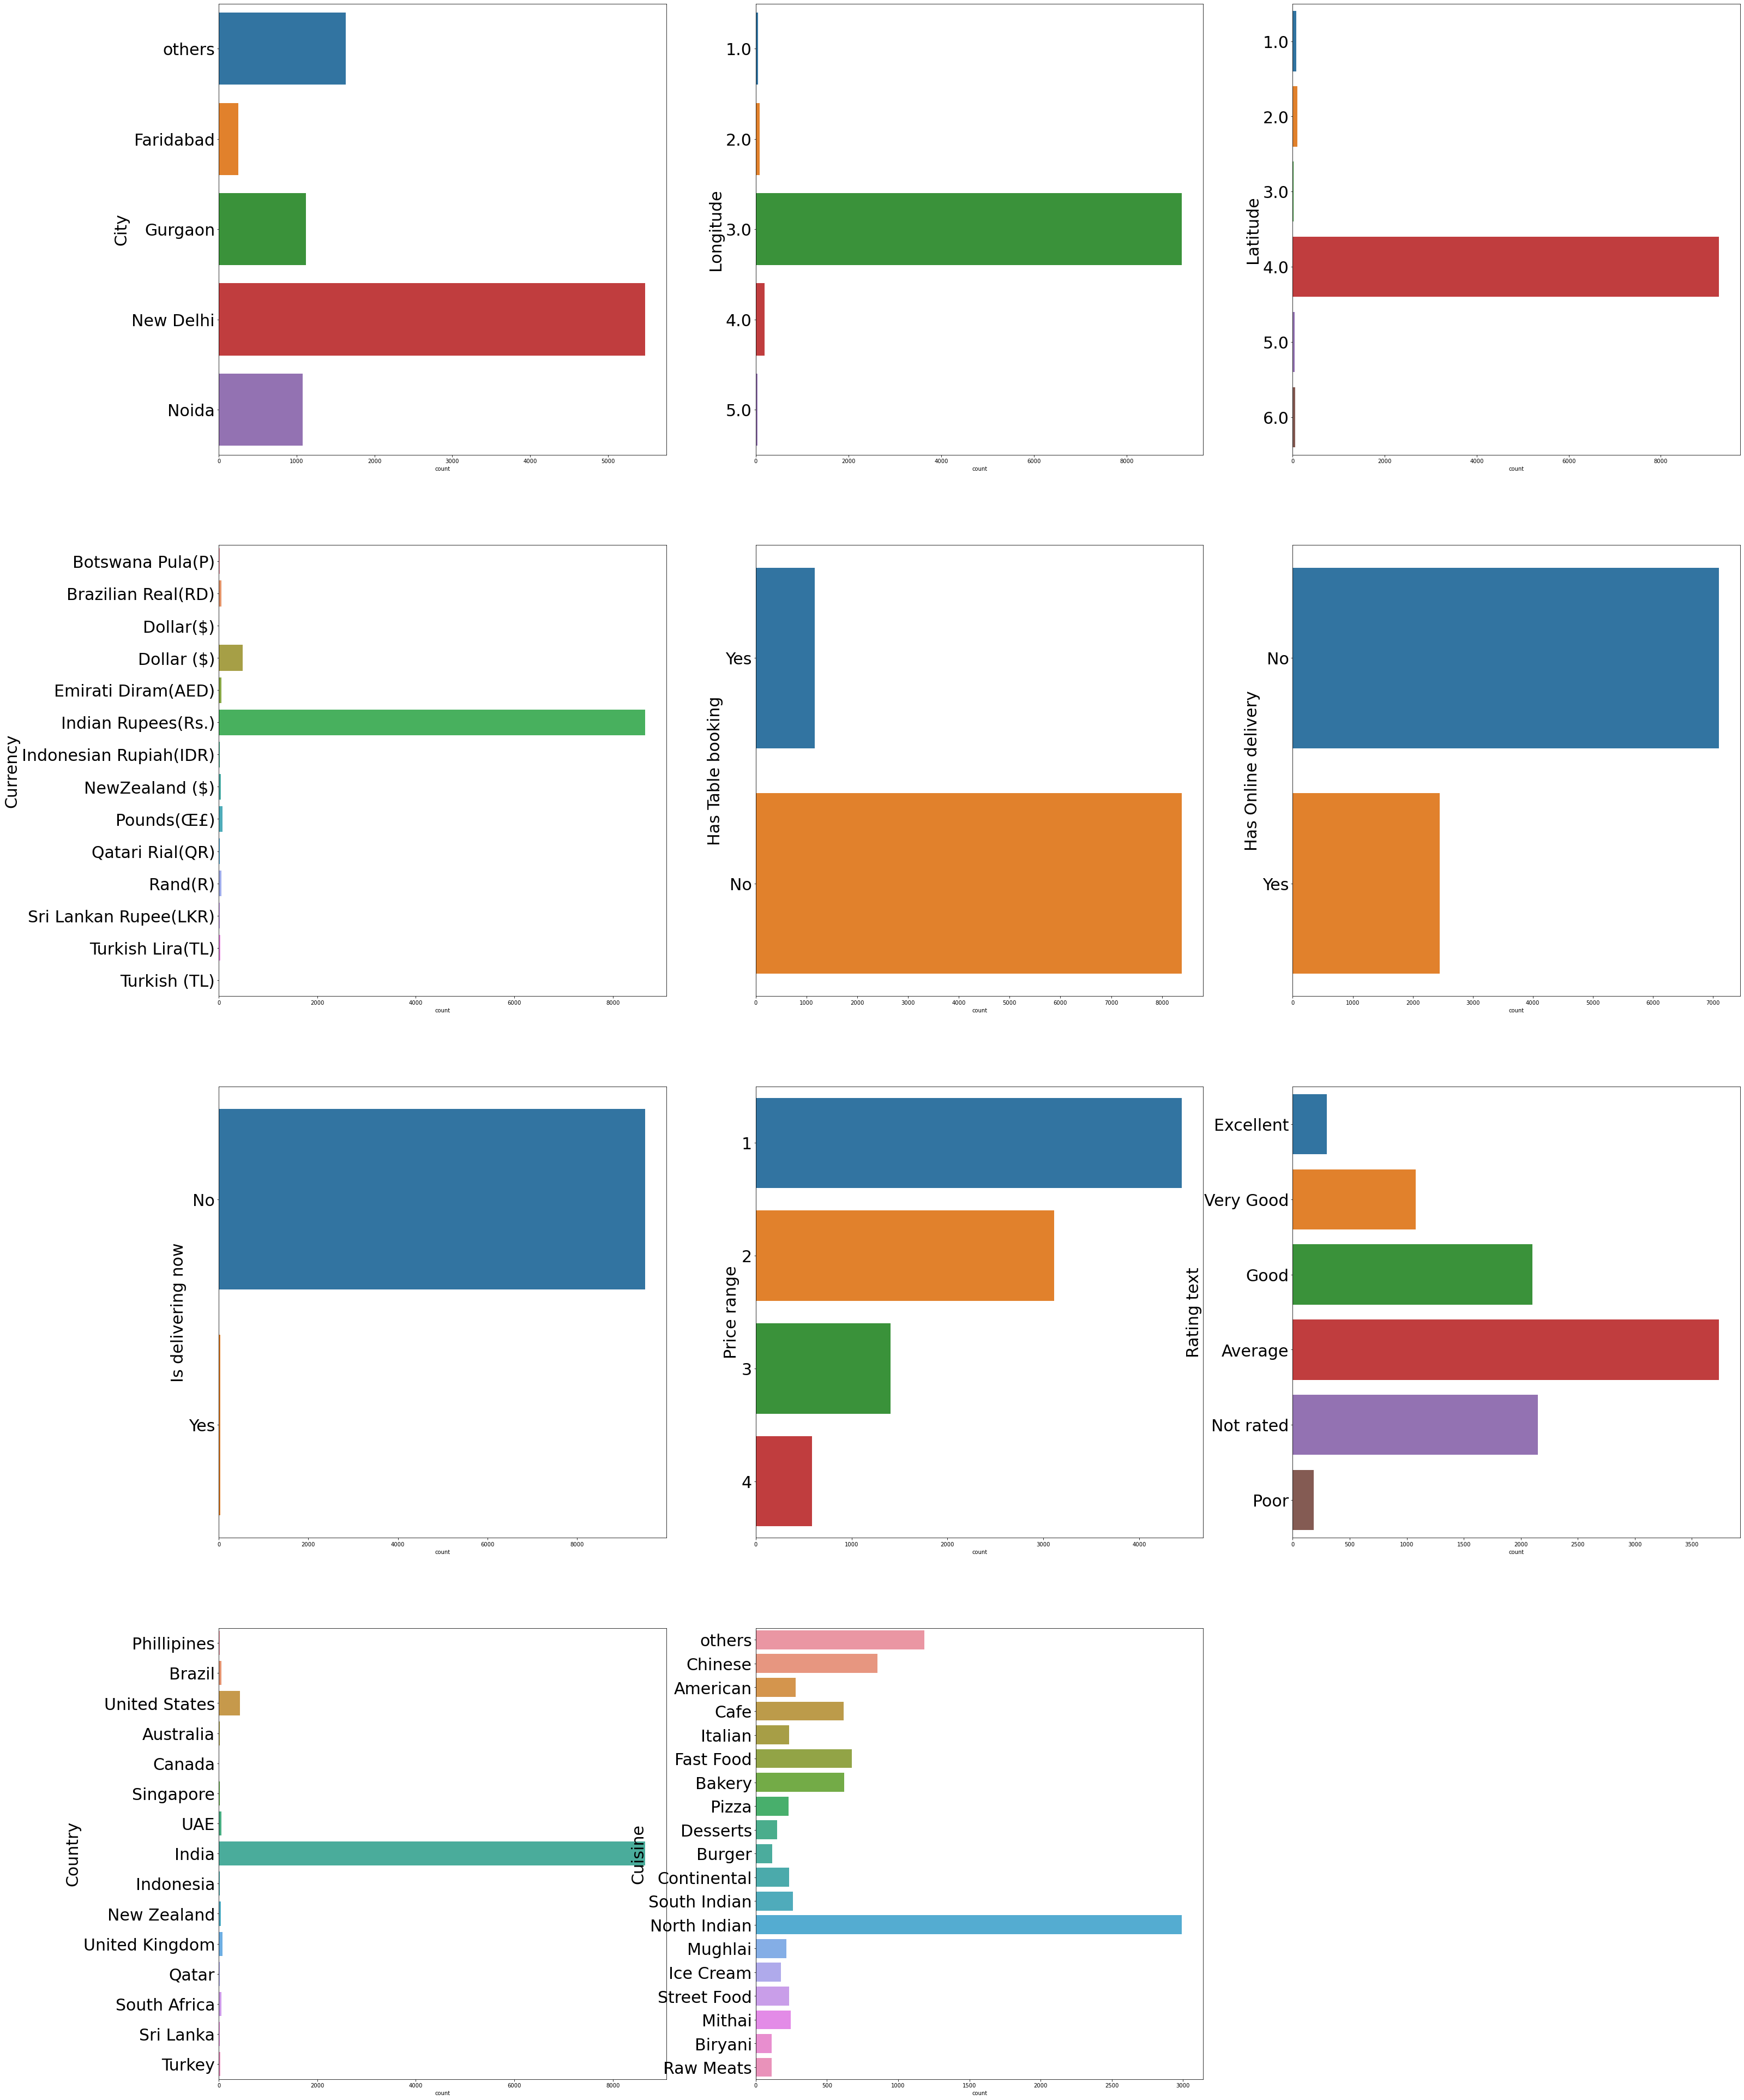

In [35]:
#Plotting count plots for categorical data

plt.figure(figsize=(50,70))
plotnumber = 1
for column in new_C_data:
    if plotnumber <=12:
        ax= plt.subplot(4,3,plotnumber)
        sns.countplot(data=new_C_data,y=new_C_data[column])
        plt.yticks(fontsize=30)
        plt.ylabel(column,fontsize=30)
        
    plotnumber+=1
plt.show

observations:

Most of the Restaurants in the dataset are Indian

Most of the Restaurants have an Average rating

The price range is mostly category 1

Most of the Restaurants do not have a table booking also most of the restaurants do not deliver

Now Lets plot graphs for numerical data

In [36]:
N_data.head()

,Average Cost for two,Aggregate rating,Votes
0,1100,4.8,314
1,1200,4.5,591
2,4000,4.4,270
3,1500,4.9,365
4,1500,4.8,229


<function matplotlib.pyplot.show(close=None, block=None)>

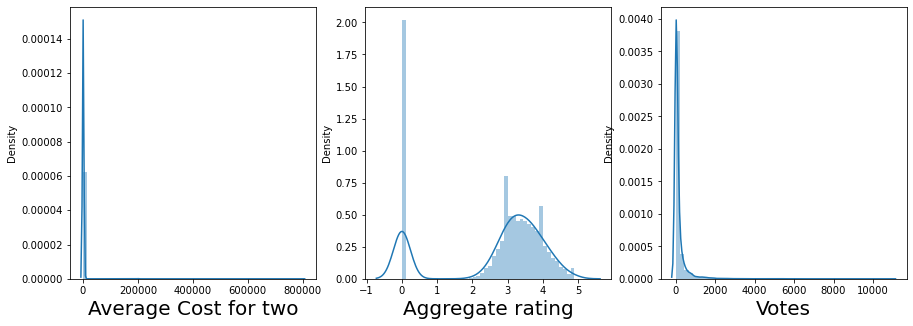

In [37]:
#Plotting graphs for numerical data
plt.figure(figsize=(15,5))
plotnumber = 1
for column in N_data:
    if plotnumber <=3:
        ax= plt.subplot(1,3,plotnumber)
        sns.distplot(N_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

The numerical colums are all skewed indicating the presence of outliers

Aggregate Rating is bi-modal

Let's check for skewness and find the outliers

In [38]:
#checking for skewness
data.skew()

Longitude               -0.300020
Latitude                -4.686081
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [39]:
# Encoding the categorical columns
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [40]:
data.head(10)

,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Cuisine
0,4,2,3,1100,0,1,0,0,2,4.8,1,314,6,18
1,4,2,3,1200,0,1,0,0,2,4.5,1,591,6,18
2,4,2,3,4000,0,1,0,0,3,4.4,5,270,6,18
3,4,2,3,1500,0,0,0,0,3,4.9,1,365,6,18
4,4,2,3,1500,0,1,0,0,3,4.8,1,229,6,18
5,4,2,3,1000,0,0,0,0,2,4.4,5,336,6,5
6,4,2,3,2000,0,1,0,0,3,4.0,5,520,6,18
7,4,2,3,2000,0,1,0,0,3,4.2,5,677,6,18
8,4,2,3,6000,0,1,0,0,3,4.9,1,621,6,18
9,4,2,3,1100,0,1,0,0,2,4.8,1,532,6,18


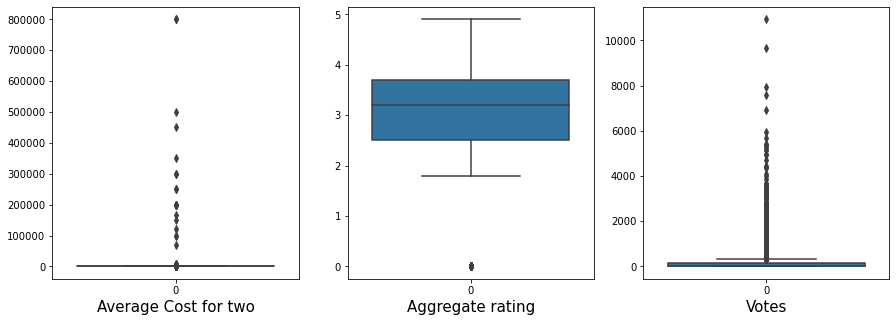

In [41]:
# Checking for outliers using boxplot
plt.figure(figsize=(15,5))
graph =1
for column in N_data:
    if graph <=3:
        plt.subplot(1,3,graph)
        ax=sns.boxplot(data=N_data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

From the above graphs we can say that most of the numerical columns have outliers which is leading to skewness of data 

In [42]:
# Using z-score to detect and treat the outliers
features=N_data
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([ 102,  336,  341,  342,  343,  350,  352,  409,  429,  454,  458,
         468,  469,  470,  472,  585,  591,  600,  644,  726,  727,  728,
         731,  735,  736,  739,  743,  793,  805,  807,  811,  813,  814,
         815,  817,  821,  824, 1144, 1147, 1163, 1235, 1247, 1248, 1251,
        1252, 1253, 1255, 1256, 1258, 1464, 1554, 1555, 1839, 1861, 1866,
        2300, 2302, 2304, 2307, 2311, 2314, 2338, 2344, 2402, 2404, 2406,
        2409, 2410, 2411, 2412, 2413, 2414, 2416, 2480, 2483, 2484, 2485,
        2488, 2490, 2492, 2495, 2499, 2635, 2880, 3005, 3008, 3013, 3016,
        3018, 3025, 3026, 3028, 3033, 3041, 3049, 3055, 3056, 3057, 3060,
        3068, 3075, 3080, 3083, 3085, 3093, 3094, 3095, 3101, 3107, 3110,
        3112, 3115, 3116, 3117, 3118, 3119, 3316, 3319, 3336, 3337, 3338,
        3438, 3588, 3589, 3599, 3601, 3605, 3976, 3983, 3984, 3986, 3992,
        3993, 3994, 3998, 4087, 4162, 4178, 4320, 4386, 4638, 4639, 4649,
        4673, 5007, 5026, 6144, 6317, 

In [43]:
new_data=data.drop(outliers[0])
new_data

,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Cuisine
0,4,2,3,1100,0,1,0,0,2,4.8,1,314,6,18
1,4,2,3,1200,0,1,0,0,2,4.5,1,591,6,18
2,4,2,3,4000,0,1,0,0,3,4.4,5,270,6,18
3,4,2,3,1500,0,0,0,0,3,4.9,1,365,6,18
4,4,2,3,1500,0,1,0,0,3,4.8,1,229,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4,3,5,80,13,0,0,0,2,4.1,5,788,11,18
9547,4,3,5,105,13,0,0,0,2,4.2,5,1034,11,18
9548,4,3,5,170,13,0,0,0,3,3.7,2,661,11,10
9549,4,3,5,120,13,0,0,0,3,4.0,5,901,11,18


In [44]:
new_data.skew()

City                     0.364465
Longitude               -1.487551
Latitude                -4.713679
Average Cost for two     3.619524
Currency                 1.304773
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Price range              0.933571
Aggregate rating        -0.940907
Rating text              0.434638
Votes                    3.216882
Country                  3.326986
Cuisine                 -0.331155
dtype: float64

In [45]:
data_loss=((9550-9362)/9550)*100
data_loss

1.9685863874345548

Since the skewness has reduced and the data loss is negligible we will use the new_data


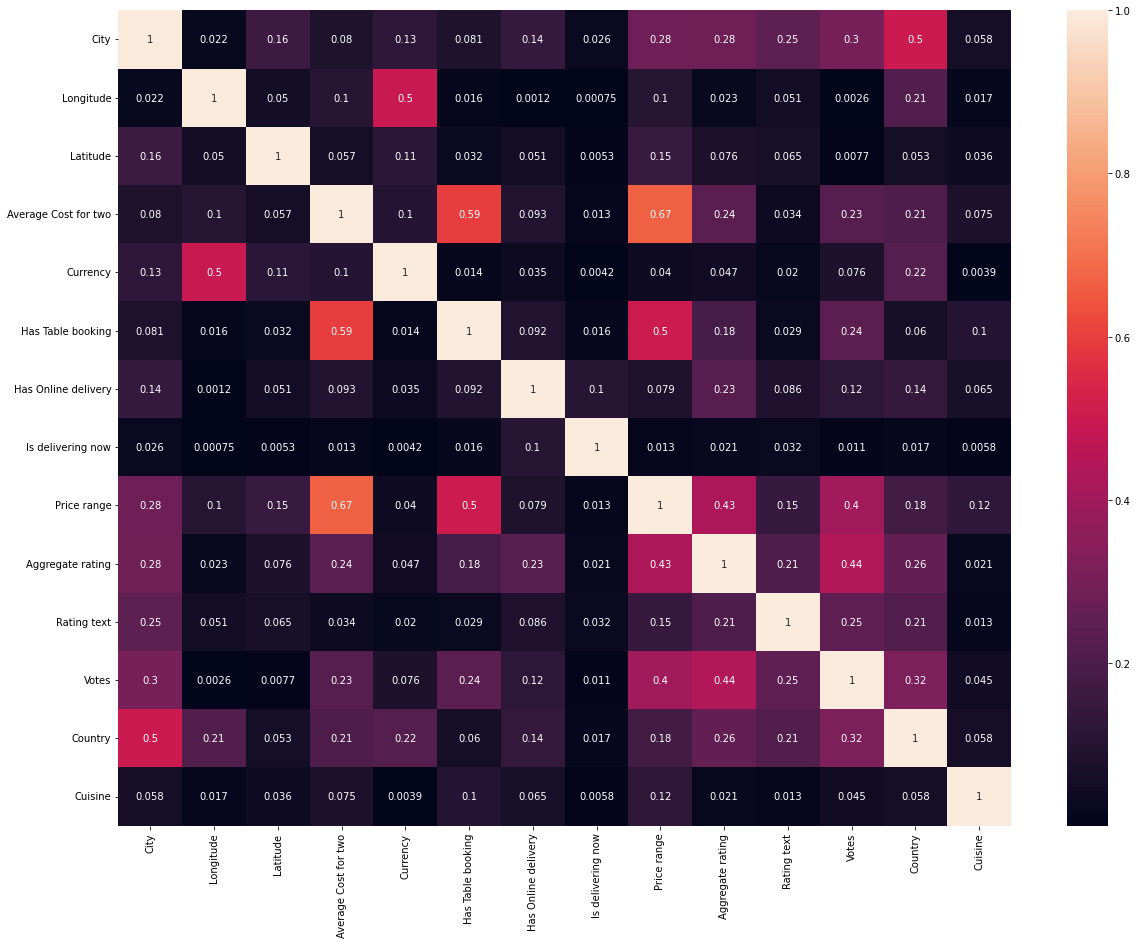

In [46]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = new_data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()


We observe:

Heat Map looks good there seems to be no multicollinearity however will double check it with VIFs



# Regression Model Building:

In [47]:
# Dividing data into feature and label
X= new_data.drop(columns=['Average Cost for two'])
Y= new_data['Average Cost for two']

In [48]:
#Applying PowerTransformer
pt = PowerTransformer()
X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)


In [49]:
X_scaled

,City,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Cuisine
0,1.712169,-0.038668,0.028613,-4.832333,2.746265,-0.586149,-0.060373,1.285629,1.864298,-0.204206,1.302234,1.559812,1.453945
1,1.712169,-0.038668,0.028613,-4.832333,2.746265,-0.586149,-0.060373,1.285629,1.536945,-0.204206,1.656273,1.559812,1.453945
2,1.712169,-0.038668,0.028613,-4.832333,2.746265,-0.586149,-0.060373,1.669821,1.430745,1.516896,1.218908,1.559812,1.453945
3,1.712169,-0.038668,0.028613,-4.832333,-0.364131,-0.586149,-0.060373,1.669821,1.976313,-0.204206,1.385762,1.559812,1.453945
4,1.712169,-0.038668,0.028613,-4.832333,2.746265,-0.586149,-0.060373,1.669821,1.864298,-0.204206,1.128534,1.559812,1.453945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,1.712169,4.692261,9.674552,6.952984,-0.364131,-0.586149,-0.060373,1.285629,1.120993,1.516896,1.819959,2.635396,1.453945
9358,1.712169,4.692261,9.674552,6.952984,-0.364131,-0.586149,-0.060373,1.285629,1.222763,1.516896,1.976055,2.635396,1.453945
9359,1.712169,4.692261,9.674552,6.952984,-0.364131,-0.586149,-0.060373,1.669821,0.728899,0.397949,1.719768,2.635396,-0.055396
9360,1.712169,4.692261,9.674552,6.952984,-0.364131,-0.586149,-0.060373,1.669821,1.020715,1.516896,1.896768,2.635396,1.453945


In [50]:
Y.skew()

3.6195240871572794

In [51]:
X_scaled.skew()

City                    0.035590
Longitude               1.678840
Latitude                2.724882
Currency                0.752558
Has Table booking       2.382516
Has Online delivery     1.120081
Is delivering now      16.505874
Price range             0.158229
Aggregate rating       -0.615772
Rating text            -0.055331
Votes                  -0.021285
Country                -1.327860
Cuisine                -0.320406
dtype: float64

After applying powertransform the skewness is under control and data looks good

In [52]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,1.447507,City
1,1.441218,Longitude
2,1.260599,Latitude
3,1.460121,Currency
4,1.356344,Has Table booking
5,1.220769,Has Online delivery
6,1.012985,Is delivering now
7,1.718391,Price range
8,4.413364,Aggregate rating
9,1.235265,Rating text


All the features have vifs less than 5 we can go ahead and build our model

In [53]:
#traintestsplit
lr = LinearRegression()
for i in range(200,500):
    x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.3, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",r2_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",r2_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  212 the model performs well
Acuraccy of training model : 53.66582488017721
Accuracy of testing model : 53.847373303272114

-----------------------------------------

At random state  213 the model performs well
Acuraccy of training model : 53.730815320563785
Accuracy of testing model : 53.668582201963574

-----------------------------------------

At random state  239 the model performs well
Acuraccy of training model : 53.51386808408365
Accuracy of testing model : 54.15061483499192

-----------------------------------------

At random state  241 the model performs well
Acuraccy of training model : 53.6051373732954
Accuracy of testing model : 53.86613525247987

-----------------------------------------

At random state  247 the model performs well
Acuraccy of training model : 53.560089068723784
Accuracy of testing model : 53.95860975042521

-----------------------------------------

At random state  253 the model performs well
Acuraccy of training model : 53.5331073953

Selecting the random state as 296 since the r2 score for test and train data is almost equal

In [54]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.3, random_state = 296)

In [55]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)

    print (algorithm)
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [56]:
#Training Model
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

reg=Ridge()
model_selection(reg,x_train,y_train,x_test,y_test)

lasso=Lasso()
model_selection(lasso,x_train,y_train,x_test,y_test)


#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

#Support Vector Regressor:
svr = SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

#AdaBoost
ada = AdaBoostRegressor()
model_selection(ada,x_train,y_train,x_test,y_test)

#XGBoost
xg = xgb.XGBRegressor()
model_selection(xg,x_train,y_train,x_test,y_test)



LinearRegression()
Acuraccy of training model : 0.5375025111209948
Accuracy of testing model : 0.5371367307660324
RMSE :  405.79984083250787

-----------------------------------------

Ridge()
Acuraccy of training model : 0.5375025017669923
Accuracy of testing model : 0.5371341035495429
RMSE :  405.8009924928267

-----------------------------------------

Lasso()
Acuraccy of training model : 0.5374402056225769
Accuracy of testing model : 0.537117455871666
RMSE :  405.80829005299887

-----------------------------------------

DecisionTreeRegressor()
Acuraccy of training model : 0.9947946622577705
Accuracy of testing model : 0.6602126234988283
RMSE :  347.68754481065173

-----------------------------------------

RandomForestRegressor()
Acuraccy of training model : 0.9726359484071169
Accuracy of testing model : 0.8333157522256391
RMSE :  243.51896701080966

-----------------------------------------

SVR()
Acuraccy of training model : 0.2969057678332996
Accuracy of testing model : 0.30165

Hyperparameter Tunning Randon Forests and XGBoost as they have the best accuracy and lower RMSE

In [57]:
# Hyperparameter Tuning:
#Random Forest
parameters = {'n_estimators':(25,50,75,100),
    'max_features':['auto','sqrt','log2'],
    'max_depth': (8,12,15),
    'min_samples_leaf': (5,8,10),
    'min_samples_split':range(5,7,10)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print ("Random Forests: \n",clf.best_params_)

#XGBoost
params = {
    'learning_rate': [0.1,0.01,0.05],
    'max_depth': [7,10,12],
    'gamma': [0, 0.5, 1]
}

clf = GridSearchCV(xg,params)
clf.fit(x_train,y_train)
print ("XGBoost: \n",clf.best_params_)


Random Forests: 
 {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 75}
XGBoost: 
 {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 7}


In [58]:
rf1= RandomForestRegressor(n_estimators=75,max_features='auto', max_depth = 15, min_samples_leaf = 5, min_samples_split = 5)
model_selection(rf1,x_train,y_train,x_test,y_test)

xg1 = xgb.XGBRegressor(gamma=1, learning_rate=0.05, max_depth=7)
model_selection(xg1,x_train,y_train,x_test,y_test)

RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=75)
Acuraccy of training model : 0.9063667833569533
Accuracy of testing model : 0.8530948180716911
RMSE :  228.6146571272869

-----------------------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             pre

Accuracy for both Decision Tree and XGBoost has increased after Hyperparameter tunning
Selecting XGBoost for prediction

In [59]:
# Saving Model
import pickle
filename= 'Zomato_reg.pkl'
pickle.dump(xg1,open(filename, 'wb'))

In [60]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (xg1.predict(x_test))

df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,550,652.528687
1,300,342.186554
2,350,383.758575
3,400,282.980194
4,400,275.181915
...,...,...
2804,200,264.103088
2805,200,266.077179
2806,200,339.548462
2807,350,296.676697


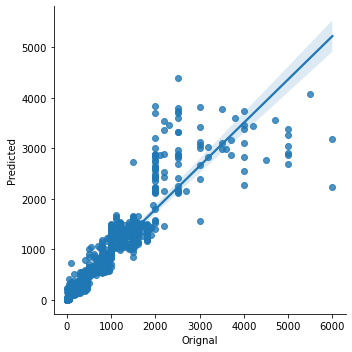

In [61]:
sns.lmplot(x='Orignal',y='Predicted',data=df)

Building Classification model

In [62]:
# Dividing data into feature and label
x= new_data.drop(columns=['Price range'])
y= new_data['Price range']

In [63]:
#Applying PowerTransformer
pt = PowerTransformer()
x_scaled = pd.DataFrame(pt.fit_transform(x), columns=x.columns)

In [64]:
x_scaled

,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,Country,Cuisine
0,1.712169,-0.038668,0.028613,1.148984,-4.832333,2.746265,-0.586149,-0.060373,1.864298,-0.204206,1.302234,1.559812,1.453945
1,1.712169,-0.038668,0.028613,1.266904,-4.832333,2.746265,-0.586149,-0.060373,1.536945,-0.204206,1.656273,1.559812,1.453945
2,1.712169,-0.038668,0.028613,3.181609,-4.832333,2.746265,-0.586149,-0.060373,1.430745,1.516896,1.218908,1.559812,1.453945
3,1.712169,-0.038668,0.028613,1.580936,-4.832333,-0.364131,-0.586149,-0.060373,1.976313,-0.204206,1.385762,1.559812,1.453945
4,1.712169,-0.038668,0.028613,1.580936,-4.832333,2.746265,-0.586149,-0.060373,1.864298,-0.204206,1.128534,1.559812,1.453945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,1.712169,4.692261,9.674552,-1.448082,6.952984,-0.364131,-0.586149,-0.060373,1.120993,1.516896,1.819959,2.635396,1.453945
9358,1.712169,4.692261,9.674552,-1.249657,6.952984,-0.364131,-0.586149,-0.060373,1.222763,1.516896,1.976055,2.635396,1.453945
9359,1.712169,4.692261,9.674552,-0.863370,6.952984,-0.364131,-0.586149,-0.060373,0.728899,0.397949,1.719768,2.635396,-0.055396
9360,1.712169,4.692261,9.674552,-1.147183,6.952984,-0.364131,-0.586149,-0.060373,1.020715,1.516896,1.896768,2.635396,1.453945


In [65]:
x_scaled.skew()

City                     0.035590
Longitude                1.678840
Latitude                 2.724882
Average Cost for two     0.084006
Currency                 0.752558
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Aggregate rating        -0.615772
Rating text             -0.055331
Votes                   -0.021285
Country                 -1.327860
Cuisine                 -0.320406
dtype: float64

In [66]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif= pd.DataFrame()
Vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif['feature']= x_scaled.columns
Vif

,vif,feature
0,1.441947,City
1,1.439453,Longitude
2,1.252741,Latitude
3,1.932534,Average Cost for two
4,1.534416,Currency
5,1.514428,Has Table booking
6,1.224200,Has Online delivery
7,1.012746,Is delivering now
8,4.412981,Aggregate rating
9,1.227561,Rating text


Data looks good all the vifs are less than 10

Lets look at the label

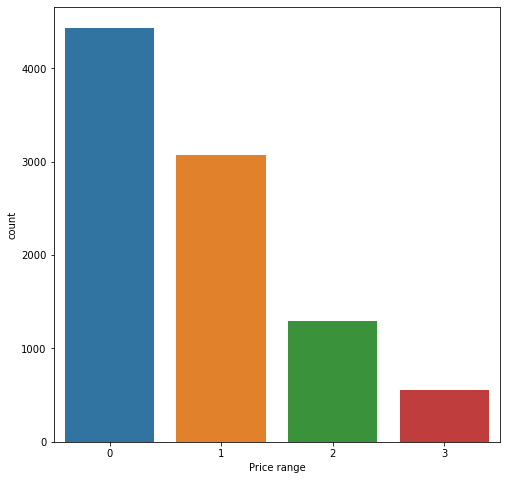

In [67]:
plt.figure(figsize=(8,8))
sns.countplot(y)
plt.show()

Label is imbalanced
Balancing Label using SMOTE

In [68]:
from imblearn.over_sampling import SMOTE
#traintestsplit
x_train_,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = 285)

In [69]:
x_train,y_train = SMOTE().fit_resample(x_train,y_train)

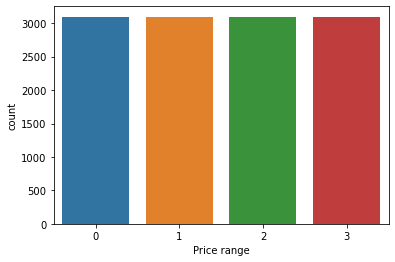

In [70]:
sns.countplot(y_train)
plt.show()

The label is now balanced

In [71]:
#traintestsplit
lg = LogisticRegression()
for i in range(300,500):
    x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  303 the model performs well
Acuraccy of training model : 79.61239127117351
Accuracy of testing model : 79.92168031327874

-----------------------------------------

At random state  304 the model performs well
Acuraccy of training model : 80.16175797344728
Accuracy of testing model : 79.88608045567818

-----------------------------------------

At random state  306 the model performs well
Acuraccy of training model : 80.05493667022738
Accuracy of testing model : 79.81488074047704

-----------------------------------------

At random state  307 the model performs well
Acuraccy of training model : 79.59713108499923
Accuracy of testing model : 80.38447846208615

-----------------------------------------

At random state  308 the model performs well
Acuraccy of training model : 80.94002746833512
Accuracy of testing model : 80.66927732289071

-----------------------------------------

At random state  309 the model performs well
Acuraccy of training model : 80.2227987181443

Acuraccy of training model : 80.22279871814436
Accuracy of testing model : 80.4556781772873

-----------------------------------------

At random state  425 the model performs well
Acuraccy of training model : 80.07019685640164
Accuracy of testing model : 80.02847988608045

-----------------------------------------

At random state  427 the model performs well
Acuraccy of training model : 79.10880512742256
Accuracy of testing model : 78.71128515485938

-----------------------------------------

At random state  428 the model performs well
Acuraccy of training model : 80.43644132458417
Accuracy of testing model : 80.27767888928445

-----------------------------------------

At random state  432 the model performs well
Acuraccy of training model : 79.74973294674194
Accuracy of testing model : 79.6368814524742

-----------------------------------------

At random state  437 the model performs well
Acuraccy of training model : 78.6052189836716
Accuracy of testing model : 79.3876824492702



Selecting 404 as random state

In [72]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = 404)

In [73]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)

    
    print(algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    print ("\n-----------------------------------------\n")
            

In [74]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train,y_train,x_test,y_test)

#Decision Tree
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train,y_train,x_test,y_test)

#SVC
svc= SVC()
model_selection(svc,x_train,y_train,x_test,y_test)

#AdaBoost
ada = AdaBoostClassifier()
model_selection(ada,x_train,y_train,x_test,y_test)

#XGBoost
xg = xgb.XGBClassifier()
model_selection(xg,x_train,y_train,x_test,y_test)



LogisticRegression()
Acuraccy of training model : 0.8133679230886617
Accuracy of testing model : 0.8102527589889641
Confusion Matrix 
 [[1204  103    0    0]
 [ 143  712   53    2]
 [  25  116  249   21]
 [   8    1   61  111]]

-----------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.906912864336945
Accuracy of testing model : 0.846564613741545
Confusion Matrix 
 [[1219   84    4    0]
 [  75  786   48    1]
 [   3  110  277   21]
 [   1    7   77   96]]

-----------------------------------------

DecisionTreeClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.9661801352794589
Confusion Matrix 
 [[1298    9    0    0]
 [   5  890   15    0]
 [   0   21  371   19]
 [   0    0   26  155]]

-----------------------------------------

RandomForestClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.9697401210395158
Confusion Matrix 
 [[1300    7    0    0]
 [   3  895   12    0]
 [   0   26  379    6]
 [

Since XGBoost has the best accuracy lets Tune its parameters and check if we can make the model better

In [75]:
# Hyperparameter Tuning :

#XGBoost
params = {
    'learning_rate': [0.1,0.05,0.01],
    'max_depth': [5,8,10],
    'gamma': [0, 0.5, 1]
}

clf = GridSearchCV(xg,params)
clf.fit(x_train,y_train)
print ("XGBoost: \n",clf.best_params_)


XGBoost: 
 {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 8}


In [76]:
#XGBoost
xg1 = xgb.XGBClassifier(gamma=1,learning_rate=0.05,max_depth=8)
model_selection(xg1,x_train,y_train,x_test,y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Acuraccy of training model : 0.9897756752632382
Accuracy of testing model : 0.9768600925596298
Confusion Matrix 
 [[1298    8    1    0]
 [   1  896   13    0]
 [   0   18  386    7]
 [   0    0   17  164]]

-------------------------------------

After observing the results of Hyperparameter Tunning Selecting XGBoost as the best model

In [77]:
# Saving Model
import pickle
filename= 'Zomato_clf.pkl'
pickle.dump(xg1,open(filename, 'wb'))

In [78]:
#Final Prediction
a= (np.array(y_test))
predicted=(np.array (xg1.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,2,2
1,2,2
2,3,2
3,0,0
4,3,3
...,...,...
2804,0,0
2805,1,1
2806,0,0
2807,1,1
